In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2022-04-14'

In [3]:
data = yf.download("AXISBANK.NS",start,end)
data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,198.779999,199.990005,197.619995,198.419998,181.382095,4371510
1,2010-01-05,199.600006,204.000000,199.139999,202.559998,185.166595,7629380
2,2010-01-06,204.000000,205.740005,198.509995,199.160004,182.058548,5953585
3,2010-01-07,199.289993,201.199997,197.820007,200.570007,183.347488,4964525
4,2010-01-08,200.600006,203.979996,199.270004,203.190002,185.742493,7931425
...,...,...,...,...,...,...,...
3026,2022-04-07,769.500000,795.000000,769.200012,792.099976,792.099976,9820244
3027,2022-04-08,794.900024,800.700012,789.000000,794.900024,794.900024,8104237
3028,2022-04-11,789.450012,794.250000,784.049988,786.049988,786.049988,6340427
3029,2022-04-12,780.099976,801.000000,777.799988,798.450012,798.450012,7672215


In [5]:
dataset = pd.read_csv('AXISBANK.csv')
dataset

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,02-Nov-20,492.50,496.85,531.70,495.10,521.90,522.65,512.23,37597227,19258497023,351710,11535022,30.68
1,03-Nov-20,522.65,525.00,537.00,524.00,533.00,534.15,531.65,25991938,13818615711,257060,8491352,32.67
2,04-Nov-20,534.15,525.10,533.85,511.00,520.05,525.15,521.80,28905623,15082931004,274440,7565911,26.17
3,05-Nov-20,525.15,534.90,542.50,527.55,537.75,539.30,535.51,23728389,12706749834,222602,9134812,38.50
4,06-Nov-20,539.30,538.75,546.00,531.20,540.00,541.75,539.39,22256961,12005124901,237515,6294781,28.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,25-Oct-21,816.70,830.10,866.90,825.45,845.00,845.10,845.74,29193770,24690238096,393459,11571601,39.64
243,26-Oct-21,845.10,848.40,851.65,823.50,844.65,841.90,837.13,16771909,14040203114,269509,7547160,45.00
244,27-Oct-21,841.90,840.00,840.80,785.65,787.35,787.50,802.83,39606414,31797139434,713561,18019299,45.50
245,28-Oct-21,787.50,787.50,789.00,754.65,759.00,758.35,770.59,19320926,14888589348,618839,9960750,51.55


In [6]:
x = data.iloc[:,1:4].values
x

array([[198.77999878, 199.99000549, 197.61999512],
       [199.6000061 , 204.        , 199.13999939],
       [204.        , 205.74000549, 198.50999451],
       ...,
       [789.45001221, 794.25      , 784.04998779],
       [780.09997559, 801.        , 777.79998779],
       [805.79998779, 805.79998779, 790.84997559]])

In [7]:
y = data.iloc[:,4].values
y

array([198.41999817, 202.55999756, 199.16000366, ..., 786.04998779,
       798.45001221, 793.04998779])

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [9]:
x_train

array([[246.        , 249.80000305, 244.00999451],
       [570.        , 576.79998779, 569.        ],
       [554.45001221, 554.84997559, 523.45001221],
       ...,
       [592.25      , 612.40002441, 592.25      ],
       [431.6000061 , 431.8999939 , 415.70001221],
       [671.        , 675.84997559, 653.        ]])

In [10]:
x_train.shape

(2273, 3)

In [11]:
x_test.shape

(758, 3)

In [12]:
y_train.shape

(2273,)

In [13]:
y_train

array([247.96000671, 571.        , 539.29998779, ..., 602.20001221,
       417.3500061 , 662.90002441])

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
x_train

array([[-1.15375662, -1.15611708, -1.1417241 ],
       [ 0.58656748,  0.58344926,  0.62582536],
       [ 0.50304273,  0.46668013,  0.37808896],
       ...,
       [ 0.70608047,  0.77283344,  0.75227702],
       [-0.15683019, -0.1873861 , -0.20793969],
       [ 1.12907591,  1.11037291,  1.08268297]])

In [16]:
x_test

array([[-1.43296045, -1.44024628, -1.42448627],
       [ 0.38460407,  0.40018295,  0.41806386],
       [ 1.8273541 ,  1.82136096,  1.88299972],
       ...,
       [-0.92708472, -0.93055857, -0.92080076],
       [-1.13022999, -1.11355896, -1.10805803],
       [ 0.47511153,  0.472798  ,  0.49747027]])

In [17]:
from sklearn.svm import SVR
regression = SVR(kernel='linear')
regression.fit(x_train, y_train)

SVR(kernel='linear')

In [18]:
y_pred = regression.predict(x_test)

In [19]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[194.31080636, 194.27999878],
       [535.14151031, 536.54998779],
       [802.94342549, 803.84997559],
       ...,
       [288.32233389, 291.07000732],
       [253.24890553, 256.5       ],
       [549.82181562, 553.65002441]])

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

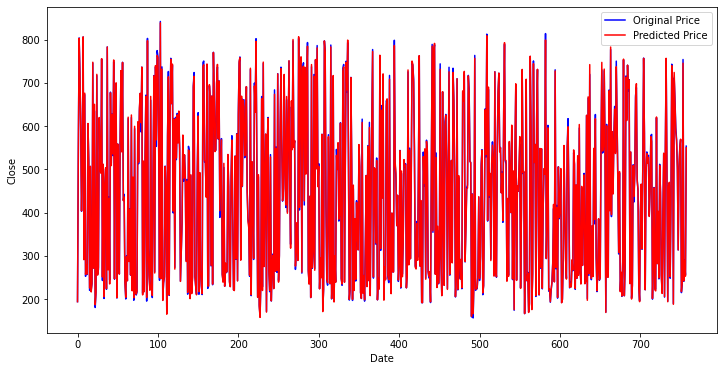

In [21]:
fig2 =plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

In [22]:
x_dt = data.iloc[:,1:4].values
x_dt

array([[198.77999878, 199.99000549, 197.61999512],
       [199.6000061 , 204.        , 199.13999939],
       [204.        , 205.74000549, 198.50999451],
       ...,
       [789.45001221, 794.25      , 784.04998779],
       [780.09997559, 801.        , 777.79998779],
       [805.79998779, 805.79998779, 790.84997559]])

In [23]:
y_dt = data.iloc[:,4].values
y_dt


array([198.41999817, 202.55999756, 199.16000366, ..., 786.04998779,
       798.45001221, 793.04998779])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

In [26]:
x_test = sc.transform(x_test)

In [27]:
x_train

array([[-1.15375662, -1.15611708, -1.1417241 ],
       [ 0.58656748,  0.58344926,  0.62582536],
       [ 0.50304273,  0.46668013,  0.37808896],
       ...,
       [ 0.70608047,  0.77283344,  0.75227702],
       [-0.15683019, -0.1873861 , -0.20793969],
       [ 1.12907591,  1.11037291,  1.08268297]])

In [28]:
from sklearn.tree import DecisionTreeRegressor
regression = DecisionTreeRegressor(random_state=0)
regression.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

In [29]:
y_pred = regression.predict(x_test)

In [30]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[196.25      , 194.27999878],
       [541.45001221, 536.54998779],
       [803.79998779, 803.84997559],
       ...,
       [286.54000854, 291.07000732],
       [254.63999939, 256.5       ],
       [553.29998779, 553.65002441]])

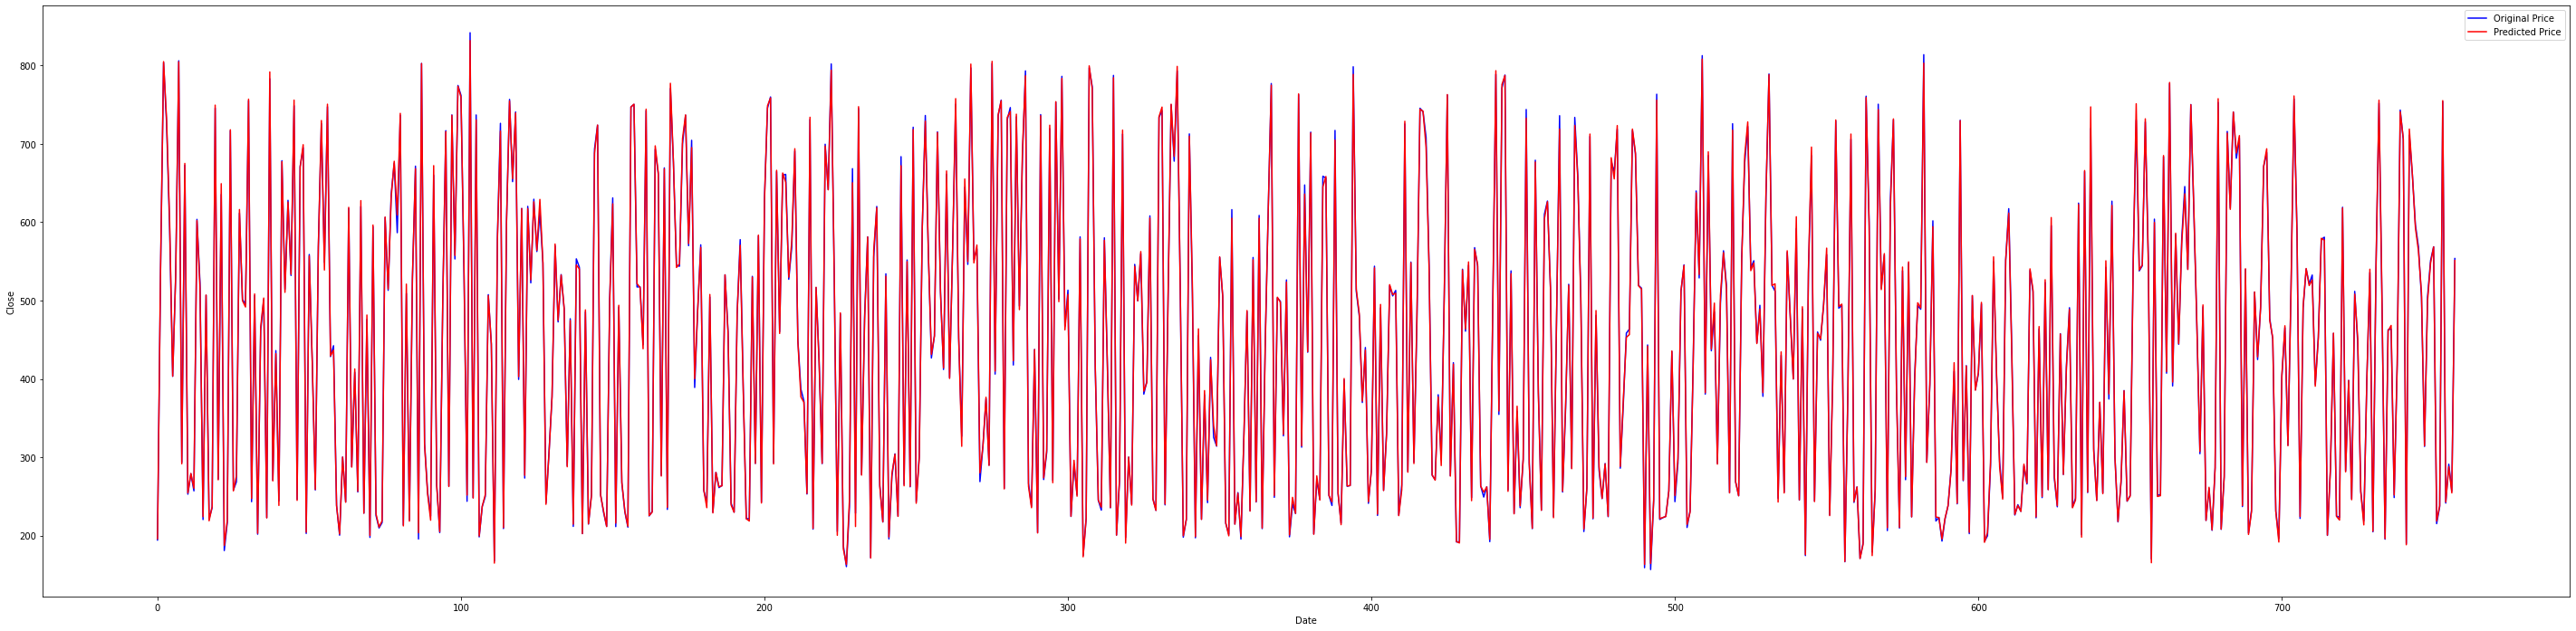

In [42]:
fig2 =plt.figure(figsize=(50,12))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test,y_pred)

0.9991290795434311

In [34]:
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(n_estimators=10, random_state=0)
regression.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [35]:
y_pred = regression.predict(x_test)

In [36]:
input_data = [[198.779999, 199.990005, 197.619995]]
input_data = sc.transform(input_data)
print(regression.predict(input_data))

[198.63499908]


In [37]:
np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)

array([[196.01099854, 194.27999878],
       [539.71499634, 536.54998779],
       [805.        , 803.84997559],
       ...,
       [287.95899658, 291.07000732],
       [254.44500122, 256.5       ],
       [551.05499268, 553.65002441]])

In [38]:
r2_score(y_test,y_pred)

0.9994636495113043